<a href="https://colab.research.google.com/github/BrainsCorp/Deep-Learning-Guide/blob/main/Fashion_MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Student Name: Vishal
# Student ID: n01676081

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

# import tensorflow layers dense crossEntropy Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

#
from sklearn.metrics import classification_report

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


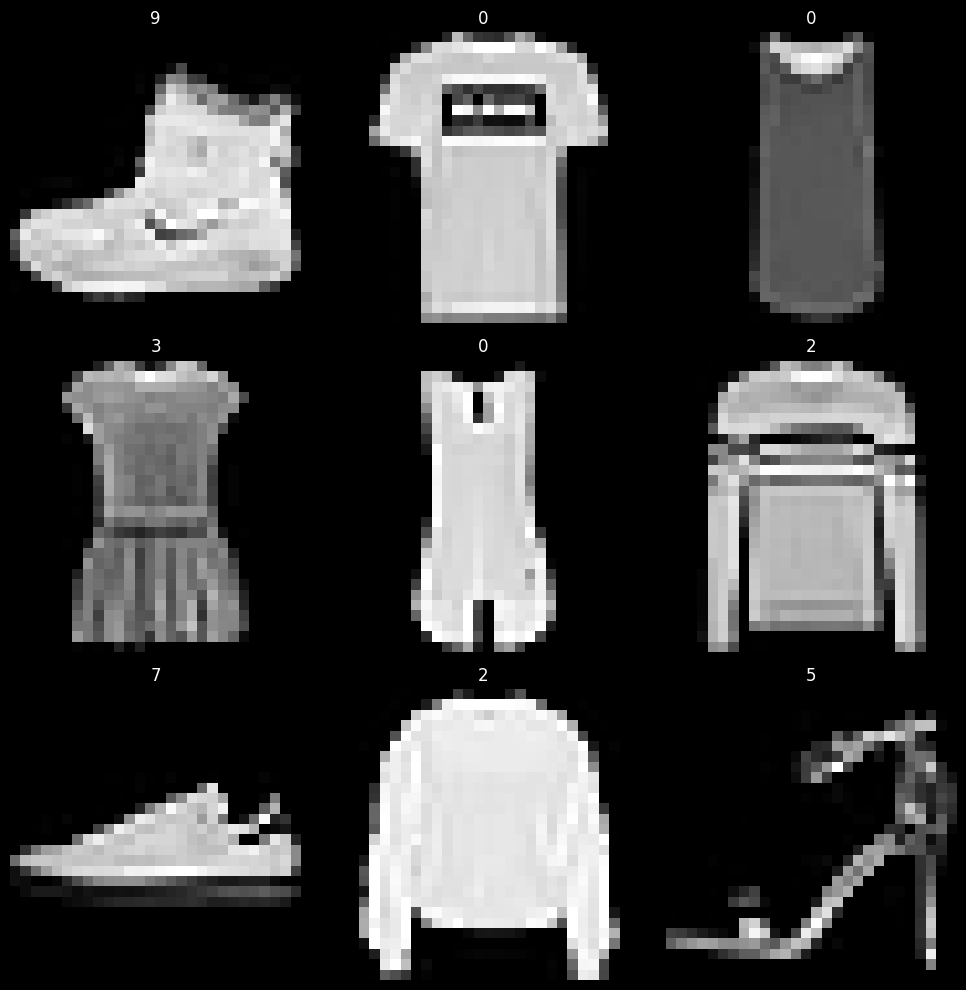

In [6]:
## visualize
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = ax.flatten()
for i in range(9):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].set_title(train_labels[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### Input Standardization
**NOTE :** why use mean and std of train data ✅\
The primary reason for standardizing the test data with the mean and standard deviation of the training data is to maintain consistency and avoid data leakage. Here's a breakdown of the benefits:

1. **Consistency**: By using the same statistics for both training and test data, you ensure that the model is making predictions on data that has been transformed in the same way as the data it was trained on. This prevents the model from being biased towards the specific scale of the test data.

1. **Data Leakage**: If you were to use the mean and standard deviation of the test data to standardize it, you would be effectively using information from the test data to train the model. This is known as data leakage and can lead to overfitting, where the model performs well on the training data but poorly on unseen data.

1. **Improved Model Performance**: Standardization often improves the performance of machine learning models, especially those that are sensitive to the scale of the data, such as neural networks and support vector machines. By standardizing the data, you can help the model converge faster and avoid numerical instability.

In [7]:
## preprocessing
# Standardize the data.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

print(f"train img mean: {mean}")
print(f"train img stddev: {stddev}")

train img mean: 72.94035223214286
train img stddev: 90.02118235130519


In [8]:
## After standarization
mean = np.mean(train_images)
stddev = np.std(train_images)
mean_t = np.mean(test_images)
stddev_t = np.std(test_images)

print(f"train img mean: {mean:.2f}")
print(f"train img stddev: {stddev}")
print(f"test img mean: {mean_t:.2f}")
print(f"test img stddev: {stddev_t}")

train img mean: -0.00
train img stddev: 1.0
test img mean: 0.00
test img stddev: 0.9983567948193489


In [9]:
# One-hot encode labels.
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Weight Intialization Technique
Methods:
1. `he_normal`
1. `he_uniform` - Purpose: Specifically designed for layers with ReLU (Rectified Linear Unit) activation functions. Suitable For: ReLU and its variants (e.g., Leaky ReLU).
1. `glorot_uniform` - Purpose: Designed to keep the scale of the gradients roughly the same in all layers. Suitable For: Activation functions like Sigmoid and Tanh.

## Model Logs:
1. Run 1: 1024 -> 10, epoch: 128, lr: 0.01, acc: 88.5
2. Run 2: 2048 -> 10, --------------------, acc: 88.6
3. Run 3. ----------- epoch: 64,  lr: 0.01, acc: 88.9
4. Run 4: 2048 -> 512 -> 10, -------------, acc: 89.3
5. Run 5: 2048 -> 512 -> 128 -> 10 -------, acc: 89.5, with dropout(0.2)
6. Run 6: ---------------------- lr: 0.005, acc: 90.0, loss: 0.30 with dropout(0.2)
7. Run 7: 2048 -> 512 -> 10, epochs: 48, lr: 0.001 acc: 89.7 loss: loss: 0.29 with dropout(0.2)


In [37]:
from tensorflow import keras

EPOCHS = 48
BATCH_SIZE = 64
LR = 0.001

# Object used to initialize weights.
# initializer = keras.initializers.RandomUniform(
#     minval=-0.1, maxval=0.1)

# Create a Sequential model.
# 784 inputs.
# Three Dense (fully connected) layers
# relu as activation function for hidden layer and softmax for output
model = keras.Sequential(layers = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2048, activation='relu',
                       kernel_initializer='he_uniform',
                       bias_initializer='zeros'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu',
                       kernel_initializer='he_uniform',
                       bias_initializer='zeros'),
    # keras.layers.Dropout(0.2),
    # keras.layers.Dense(128, activation='relu',
    #                    kernel_initializer='he_uniform',
    #                    bias_initializer='zeros'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

# Use stochastic gradient descent (SGD) with
# learning rate of 0.01 and no other bells and whistles.
# CrossEntropy as loss function and report accuracy during training.
opt = keras.optimizers.SGD(learning_rate=LR, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer = opt,
              metrics =['accuracy'])

# Shuffle (randomize) order.
# Update weights after each example (batch_size=1).
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=2, shuffle=True)

Epoch 1/48
938/938 - 6s - 7ms/step - accuracy: 0.7835 - loss: 0.6110 - val_accuracy: 0.8400 - val_loss: 0.4440
Epoch 2/48
938/938 - 2s - 2ms/step - accuracy: 0.8397 - loss: 0.4418 - val_accuracy: 0.8523 - val_loss: 0.4091
Epoch 3/48
938/938 - 2s - 2ms/step - accuracy: 0.8547 - loss: 0.4011 - val_accuracy: 0.8610 - val_loss: 0.3879
Epoch 4/48
938/938 - 3s - 3ms/step - accuracy: 0.8631 - loss: 0.3751 - val_accuracy: 0.8643 - val_loss: 0.3716
Epoch 5/48
938/938 - 3s - 3ms/step - accuracy: 0.8715 - loss: 0.3544 - val_accuracy: 0.8671 - val_loss: 0.3616
Epoch 6/48
938/938 - 2s - 2ms/step - accuracy: 0.8758 - loss: 0.3402 - val_accuracy: 0.8721 - val_loss: 0.3533
Epoch 7/48
938/938 - 2s - 2ms/step - accuracy: 0.8807 - loss: 0.3282 - val_accuracy: 0.8728 - val_loss: 0.3498
Epoch 8/48
938/938 - 3s - 3ms/step - accuracy: 0.8826 - loss: 0.3184 - val_accuracy: 0.8725 - val_loss: 0.3461
Epoch 9/48
938/938 - 2s - 2ms/step - accuracy: 0.8886 - loss: 0.3079 - val_accuracy: 0.8802 - val_loss: 0.3319
E

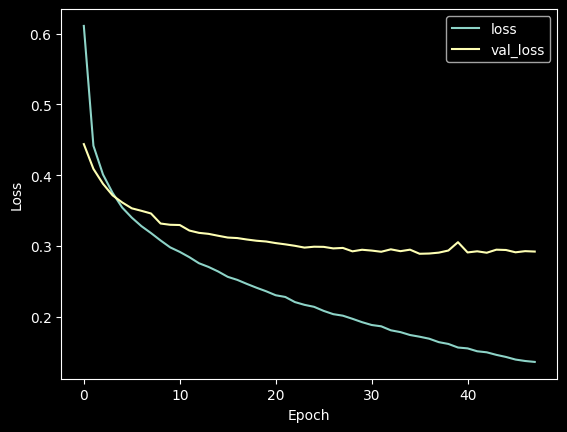

In [38]:
# train and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
## evalute
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc} => {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.2936
Test accuracy: 0.8978999853134155 => 0.90


## Batch Normalization

In [52]:
from tensorflow import keras

EPOCHS = 48
BATCH_SIZE = 64
LR = 0.001

# Object used to initialize weights.
# initializer = keras.initializers.RandomUniform(
#     minval=-0.1, maxval=0.1)

# Create a Sequential model.
# 784 inputs.
# Relu as activation function for hidden layer.
# Softmax as activation function for output layer.
model = keras.Sequential(layers = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2048, activation='relu',
                       kernel_initializer='he_uniform',
                       bias_initializer='zeros'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='relu',
                       kernel_initializer='he_uniform',
                       bias_initializer='zeros'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(256, activation='relu',
    #                    kernel_initializer='he_uniform',
    #                    bias_initializer='zeros'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu',
                       kernel_initializer='he_uniform',
                       bias_initializer='zeros'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='glorot_uniform',
                       bias_initializer='zeros')])

# Use stochastic gradient descent (SGD) with
# learning rate of 0.01 and no other bells and whistles.
# CrossEntropy as loss function and report accuracy during training.
opt = keras.optimizers.SGD(momentum=0.9, learning_rate=LR)

model.compile(loss='categorical_crossentropy', optimizer = opt,
              metrics =['accuracy'])

# Shuffle (randomize) order.
# Update weights after each example (batch_size=1).
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=2, shuffle=True)

Epoch 1/48
938/938 - 8s - 9ms/step - accuracy: 0.7470 - loss: 0.7459 - val_accuracy: 0.8384 - val_loss: 0.4607
Epoch 2/48
938/938 - 3s - 3ms/step - accuracy: 0.8180 - loss: 0.5178 - val_accuracy: 0.8519 - val_loss: 0.4164
Epoch 3/48
938/938 - 3s - 3ms/step - accuracy: 0.8341 - loss: 0.4683 - val_accuracy: 0.8612 - val_loss: 0.3947
Epoch 4/48
938/938 - 2s - 2ms/step - accuracy: 0.8442 - loss: 0.4379 - val_accuracy: 0.8641 - val_loss: 0.3787
Epoch 5/48
938/938 - 2s - 3ms/step - accuracy: 0.8502 - loss: 0.4175 - val_accuracy: 0.8673 - val_loss: 0.3683
Epoch 6/48
938/938 - 2s - 2ms/step - accuracy: 0.8588 - loss: 0.3982 - val_accuracy: 0.8701 - val_loss: 0.3599
Epoch 7/48
938/938 - 3s - 3ms/step - accuracy: 0.8618 - loss: 0.3843 - val_accuracy: 0.8730 - val_loss: 0.3544
Epoch 8/48
938/938 - 5s - 5ms/step - accuracy: 0.8668 - loss: 0.3736 - val_accuracy: 0.8741 - val_loss: 0.3484
Epoch 9/48
938/938 - 2s - 3ms/step - accuracy: 0.8697 - loss: 0.3613 - val_accuracy: 0.8763 - val_loss: 0.3418
E

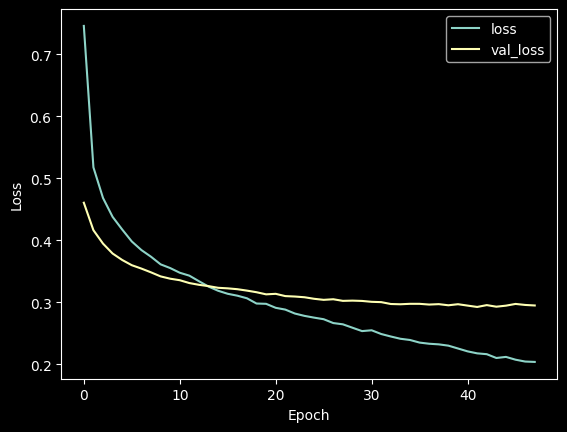

In [53]:
# train and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
# evalute
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc} -> {round(test_acc, 2)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.3003
Test accuracy: 0.8999000191688538 -> 0.9


## Interpetation:
1. For few runs, simple model with two layers (2048, 10) was doing great achieved max acc. 88.5. Problem: with more epochs the model was overfitting, with train acc: 98% and test: 89% and validation loss: ~ 0.4 only not stablize model. validation loss 0.37 was not decreasing => model overfitting
1. So, increase depth of the model: (2048, 512, 10) increases tes acc by 0.02
1. Discovered: (`he uniform` with `ReLu`) and (`glorot_uniform` with `softmax`) is great combination of weight initialization techniques, works for stabilizing the model and saturated neuron problem.
1. `Batch norm` helps in stablizing the model which is suffering from Train and test score variation and increases model training speed. Getting model validation loss: 0.29 and model train acc: 0.92 and test acc: 89.6.
1. `Dropout` with 0.2 helps in increasing acc to 0.8999 => `0.90`
1. `learning rate 0.001` best learning rate, helps in lowering validation loss
1. **Best Model so far:**
layers (2048, 512, 64, 10) with batchnorm, dropout(0.2) and `he_uniform` at hiddlen layers and `glorot_uniform` at output layer. train acc: 92.3 and test acc: 90.0, stable model. with best low validation of 0.30.

# ----------------------------------------------------------------------------------------------------------------------------

## CNN
tried cnn just for fun not part of assignment

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
##
model_cnn = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model_cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_cnn.add(tf.keras.layers.Dropout(0.3))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model_cnn.add(tf.keras.layers.Dropout(0.3))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='he_uniform'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)         

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_cnn.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = model_cnn.fit(train_images, train_labels, batch_size=128,
              epochs=32, validation_data=(test_images, test_labels))

Epoch 1/32
469/469 [==============================] - 17s 35ms/step - loss: 0.6577 - accuracy: 0.7633 - val_loss: 0.6064 - val_accuracy: 0.7637
Epoch 2/32
469/469 [==============================] - 14s 31ms/step - loss: 0.4621 - accuracy: 0.8303 - val_loss: 0.3694 - val_accuracy: 0.8628
Epoch 3/32
469/469 [==============================] - 15s 33ms/step - loss: 0.4170 - accuracy: 0.8455 - val_loss: 0.3489 - val_accuracy: 0.8731
Epoch 4/32
469/469 [==============================] - 15s 32ms/step - loss: 0.3890 - accuracy: 0.8578 - val_loss: 0.3242 - val_accuracy: 0.8775
Epoch 5/32
469/469 [==============================] - 15s 32ms/step - loss: 0.3657 - accuracy: 0.8664 - val_loss: 0.3124 - val_accuracy: 0.8816
Epoch 6/32
469/469 [==============================] - 15s 31ms/step - loss: 0.3532 - accuracy: 0.8714 - val_loss: 0.3050 - val_accuracy: 0.8875
Epoch 7/32
469/469 [==============================] - 15s 31ms/step - loss: 0.3391 - accuracy: 0.8755 - val_loss: 0.2966 - val_accuracy:

In [ ]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2297 - accuracy: 0.9156
Test accuracy: 0.9156000018119812
